In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [18]:
demo_all = pd.read_csv('data/data/demo_all.csv')

diet_all = pd.read_csv('data/data/diet_all.csv')

exam_all = pd.read_csv('data/data/exam_all.csv')

labs_all = pd.read_csv('data/data/labs_all.csv')

questionnaire_all = pd.read_csv('data/data/questionnaire_all.csv')

In [2]:
df = pd.read_csv('try_data/final_data.csv')

In [38]:
df.shape

(59214, 20)

### Explore CVD 

/Users/harrygao/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


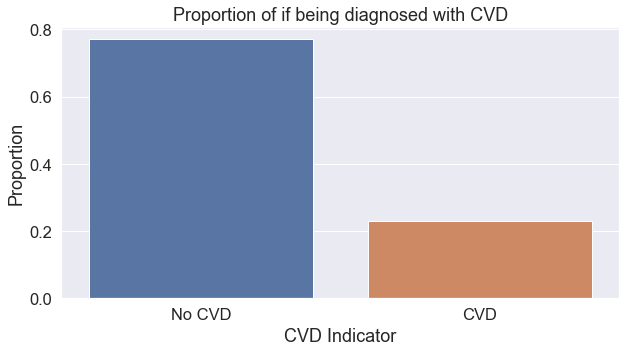

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.set(font_scale=1.5)
ax = sns.barplot(if_cvd.index, if_cvd.values)
ax.set_xticklabels(['No CVD', 'CVD'])
ax.set_title('Proportion of if being diagnosed with CVD')
ax.set_xlabel('CVD Indicator')
ax.set_ylabel('Proportion')
plt.show()

### Is there a correlation between gender and CVD

In [39]:
data = df[['RIAGENDR', 'Target']]
gender = data[['RIAGENDR', 'Target']].dropna(how='any')

contingency_table = pd.crosstab(
    gender['RIAGENDR'],
    gender['Target'],
    margins=True, 
    rownames=['Gender'],
    colnames=['CVD Indicator']
)
contingency_table

CVD Indicator,0.0,1.0,All
Gender,,,
1.0,20150,7734,27884
2.0,25467,5863,31330
All,45617,13597,59214


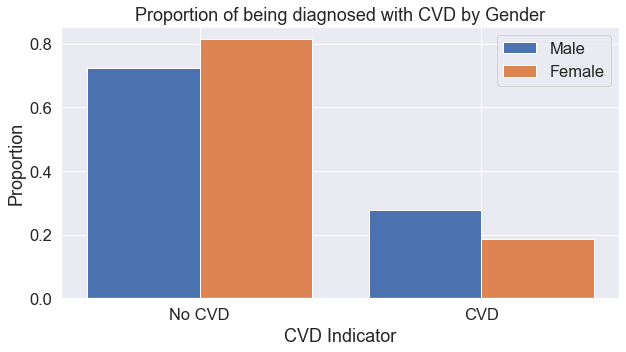

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.set(font_scale=1.5)

malecount = contingency_table.iloc[0][:2].values /27884
femalecount = contingency_table.iloc[1][:2].values / 31330

categories = ["No CVD","CVD"]
x = np.arange(len(categories))

bar_width = 0.4
b1 = ax.bar(x, malecount, 
            width=bar_width, label='Male')
b2 = ax.bar(x + bar_width, femalecount, 
            width=bar_width, label='Female')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(categories)

# Label the plot.
plt.legend()
ax.set_title('Proportion of being diagnosed with CVD by Gender')
ax.set_xlabel('CVD Indicator')
ax.set_ylabel('Proportion')
plt.show()

H0 : There is no statistically significant relationship between gender and CVD.

H1: There is a statistically significant relationship between gender and CVD.

In [43]:
f_obs = np.array([contingency_table.iloc[0][0:2].values,
                  contingency_table.iloc[1][0:2].values])
chi2, p, dof, expected = stats.chi2_contingency(f_obs)
print('chi-square statistic = ',chi2, '\np-value = ', p, '\ndegrees of freedom = ', dof, '\nexpected values = ', expected)


chi-square statistic =  678.439787358936 
p-value =  1.4595488490096886e-149 
degrees of freedom =  1 
expected values =  [[21481.14344581  6402.85655419]
 [24135.85655419  7194.14344581]]


### Is there a correlation between age and CVD?

In [44]:
age_corr = df[['RIDAGEYR','Target']]

In [45]:
age = pd.cut(age_corr['RIDAGEYR'],bins=4,right=False)

Text(0.5, 1.0, 'The distribution of ages')

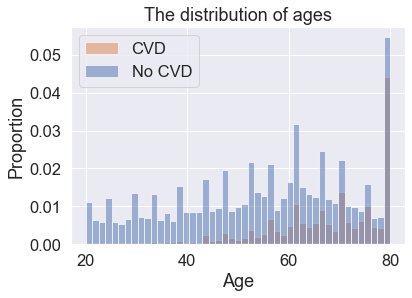

In [46]:
sns.histplot(x='RIDAGEYR', data=age_corr, hue='Target', stat='density')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.legend(['CVD','No CVD'])
plt.title('The distribution of ages')

In [47]:
age_corr['Age'] = age

<ipython-input-47-e57b7b87213c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_corr['Age'] = age


In [48]:
contingency_table = pd.crosstab(
    age_corr['Age'],
    age_corr['Target'],
    margins=True, 
    rownames=['AGE'],
    colnames=['CVD']
)
contingency_table

CVD,0.0,1.0,All
AGE,,,
"[20.0, 35.0)",7149,125,7274
"[35.0, 50.0)",9501,928,10429
"[50.0, 65.0)",14184,3710,17894
"[65.0, 80.06)",14783,8834,23617
All,45617,13597,59214


H0 : There is no statistically significant relationship between age and CVD.

H1: There is a statistically significant relationship between age and CVD.

In [49]:
f_obs = np.array([contingency_table.iloc[0][0:2].values,
                  contingency_table.iloc[1][0:2].values,
                 contingency_table.iloc[2][0:2].values,
                 contingency_table.iloc[3][0:2].values])

chi2, p, dof, expected = stats.chi2_contingency(f_obs)
print('chi-square statistic = ',chi2, '\np-value = ', p, '\ndegrees of freedom = ', dof, '\nexpected values = ', expected)

chi-square statistic =  5857.066214854067 
p-value =  0.0 
degrees of freedom =  3 
expected values =  [[ 5603.70956193  1670.29043807]
 [ 8034.24347283  2394.75652717]
 [13785.09470733  4108.90529267]
 [18193.95225791  5423.04774209]]
